# Capstone Project Report - Car accident severity
### Course: Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussions](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

Traffic accidents are a major concern to individual safety and financial costs. It is generally expected that the hazardous conditions include driving at night or in the rain. We conduct an investigation based on previous traffic accident data to evaluate the impact of these conditions and to possibly determine other lesser-known factors that increase accident risk. 

**Question: What factors have increased probabilty of severe collisions?**

## Data <a name="data"></a>

A dataset of traffic collisions within the Seattle-area was provided by the SPD and recorded by Traffic Records. This dataset can be downloaded by __[clicking here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)__. This dataset includes reported collisions from 2004-present. 

This dataset includes a number of factors related to the reported incident. A ‘severity’ parameter has been included that corresponds to the severity of the collision. This parameter ranges from unknown, property damage, injury, serious injury, and fatality. This parameter will be evaluated to determine the hazardous driving conditions.

This dataset provides a number of details to determine these hazardous conditions. Particular factors include:
-	Date
-	Driver distraction	(Y/N)
-	Driver under the influence (Y/N)
-	Road Conditions (Dry, Wet, etc)
-	Light Conditions (Daylight, Dark, etc)
-	Speeding involved (Y/N)
-	Parked Car (Y/N)


## Methodology <a name="methodology"></a>

This section is divided into the following:

- Data Preperation: Imports required packages and organizes a dataframe sub-set from the full dataframe for desired features only.

- ML Preperation: Imports machine learning packages and organizes the dataframe sub-set to permit input to the machine learning algorithms.

- ML Scripts

### Data Preperation

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# READ IN DATA
df = pd.read_csv('Data-Collisions.csv')
# df.dtypes

/Users/calelewis/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# CREATE SHORTLIST OF DESIRED FACTORS
short_df = df[['SEVERITYCODE','INCDATE', 'ADDRTYPE','COLLISIONTYPE','ROADCOND','LIGHTCOND','SPEEDING', 'INATTENTIONIND', 'UNDERINFL','HITPARKEDCAR']]
short_df.head()


# change 'INCDATE' to datetime
short_df['INCDATE'] =  pd.to_datetime(short_df['INCDATE'], format='%Y/%m/%d')
short_df['YEAR'] = pd.DatetimeIndex(short_df['INCDATE']).year
short_df['MONTH'] = pd.DatetimeIndex(short_df['INCDATE']).month
short_df['DAY_OF_WEEK'] = pd.DatetimeIndex(short_df['INCDATE']).dayofweek

short_df.drop('INCDATE', axis=1, inplace=True)


# fix 'UNDERINFL' column of mixed types
short_df['UNDERINFL'].replace(('Y', 'N'), (1, 0), inplace=True)
short_df['UNDERINFL'].replace(('1', '0'), (1, 0), inplace=True)

short_df['SPEEDING'].replace(np.nan, 'N', inplace=True)
short_df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
short_df['UNDERINFL'].replace(np.nan, 0.0, inplace=True)

# short_df.dtypes

/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/calelewis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

### ML Preperation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [4]:
y = short_df['SEVERITYCODE']

X = short_df.drop('SEVERITYCODE', axis=1).values
X[pd.isnull(X)] = 'NaN'

## Convert catagorical variables to numbers
addr_conditions = preprocessing.LabelEncoder()
addr_conditions.fit(['Block','Intersection','NaN', 'Alley'])
X[:,0] = addr_conditions.transform(X[:,0]) 

coll_conditions = preprocessing.LabelEncoder()
coll_conditions.fit(['Parked Car','Angles','Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'NaN', 'Right Turn', 'Head On'])
X[:,1] = coll_conditions.transform(X[:,1]) 

road_conditions = preprocessing.LabelEncoder()
road_conditions.fit(['Dry','Wet','Unknown', 'NaN', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,2] = road_conditions.transform(X[:,2]) 

road_conditions = preprocessing.LabelEncoder()
road_conditions.fit(['Daylight','Dark - Street Lights On','Unknown', 'Dusk', 'NaN', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,3] = road_conditions.transform(X[:,3]) 

speeding = preprocessing.LabelEncoder()
speeding.fit(['Y','N'])
X[:,4] = speeding.transform(X[:,4]) 

attention = preprocessing.LabelEncoder()
attention.fit(['Y','N'])
X[:,5] = attention.transform(X[:,5]) 

influence = preprocessing.LabelEncoder()
influence.fit([0.0,1.0])
X[:,6] = influence.transform(X[:,6]) 

parked = preprocessing.LabelEncoder()
parked.fit(['Y','N'])
X[:,7] = parked.transform(X[:,7]) 

X= preprocessing.StandardScaler().fit(X).transform(X)

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

### ML Scripts

#### Decision Tree

In [5]:
# DECISION TREE
theTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
theTree.fit(X_trainset,y_trainset)
predTree = theTree.predict(X_testset)

print("Jaccard: " + str(jaccard_score(y_testset, predTree)))
print("F1: " + str(f1_score(y_testset, predTree)))

Jaccard: 0.7323953889443587
F1: 0.8455291368451938


#### Logistic Regression

In [6]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)

#Logistic Regression Calculations
yhat_lg = LR.predict(X_testset)
yhat_lg_prob = LR.predict_proba(X_testset)

print("Jaccard: " + str(jaccard_score(y_testset, yhat_lg)))
print("F1: " + str(f1_score(y_testset, yhat_lg)))
print("LogLoss: " + str(log_loss(y_testset, yhat_lg_prob)))

Jaccard: 0.6913812308549151
F1: 0.8175344721136036
LogLoss: 0.5815682713035217


#### KNN (WARNING: exceeds practical run-times due to too large feature range)

In [16]:
# KNN 
Ks = 5
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset, y_trainset)
    yhat = neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

NameError: name 'KNeighborsClassifier' is not defined

#### SVM (WARNING: exceeds practical run-times due to too large feature range)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 
svm_yhat = clf.predict(X_testset)

print("Jaccard: " + str(jaccard_score(y_testset, svm_yhat)))
print("F1: " + str(f1_score(y_testset, svm_yhat)))

## Results and Discussions <a name="results"></a>

This section is divided into the following:
- Exploratory Data Analysis
- ML Analysis

#### Exploratory Data Analysis

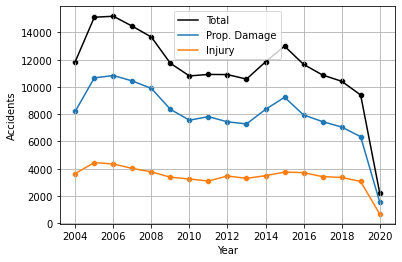

In [7]:
temp = pd.crosstab(short_df['YEAR'], short_df['SEVERITYCODE'])
data=short_df['YEAR'].value_counts(dropna=False).to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data, color='k')
sns.scatterplot(x="index", y="YEAR", data=data, color='k')

data=short_df[short_df['SEVERITYCODE'] == 1]
data = data['YEAR'].value_counts().to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data)
sns.scatterplot(x="index", y="YEAR", data=data, markers=True)

data=short_df[short_df['SEVERITYCODE'] == 2]
data = data['YEAR'].value_counts().to_frame()
data.reset_index(inplace=True)
sns.lineplot(x="index", y="YEAR", data=data)
sns.scatterplot(x="index", y="YEAR", data=data, markers=True)

plt.xlabel("Year")
plt.ylabel("Accidents")
plt.legend(['Total', 'Prop. Damage', 'Injury'])
plt.grid()

This plot shows the number of accidents for each year. We generally note a reduction in the number of accidents with increasing year. However, the present year, 2020, is not complete and therefore shows reduced number of recorded accidents. 

This plot also shows that the number of accidents resulting in property damage exceed those that result in injury. These trend similarly with time, except for a noticeable peak of property damage accidents in 2015.

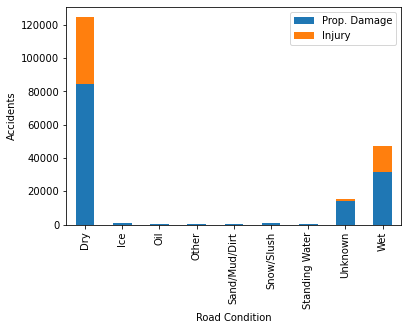

In [8]:
pd.crosstab(short_df['ROADCOND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("Road Condition")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows that more accidents have occured on 'Dry' road conditions. However, this does not suggest that 'Dry' road conditions are strictly more hazardous as it is likely the roads are 'Dry' most of the time.

Accidents during 'Wet' conditions are the second highest. Interestingly, both 'Dry' and 'Wet' conditions appear to have equivalent proportions of accidents resulting in property damage and accidents resulting in injury.

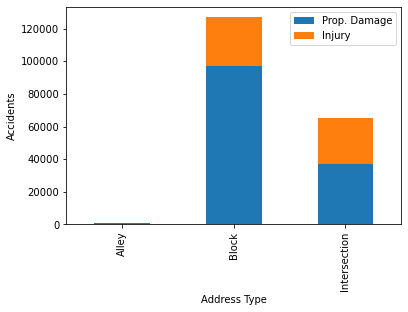

In [10]:
pd.crosstab(short_df['ADDRTYPE'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
y_pos = np.arange(2)
plt.xlabel("Address Type")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows that accidents occur more frequently on 'Blocks.' There appears to be a slight inclination of 'Intersections' resulting in proportionally more injuries than 'Blocks.'

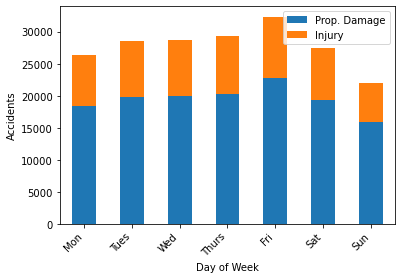

In [11]:
pd.crosstab(short_df['DAY_OF_WEEK'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
y_pos = np.arange(7)
plt.xticks(y_pos, ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation=45, horizontalalignment='right')
plt.xlabel("Day of Week")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows the number of accidents for each day of the week. There is a markable increase of accidents on Friday, with a reduction to Sunday.

There is no apparent dependence on the day of week and accidents resulting in property damage or injury.

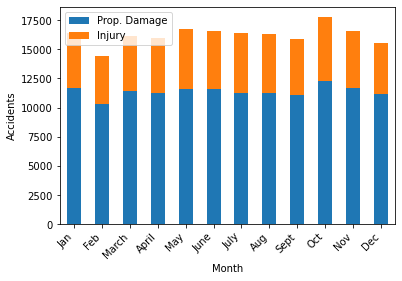

In [12]:
pd.crosstab(short_df['MONTH'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
y_pos = np.arange(12)
plt.xticks(y_pos, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July','Aug','Sept','Oct','Nov','Dec'], rotation=45, horizontalalignment='right')
plt.xlabel("Month")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows the number of accidents for each month. February experiences the least amount of accidents, while October experiences the highest amount of accidents.

There is no apparent dependence on the day of week and accidents resulting in property damage or injury.

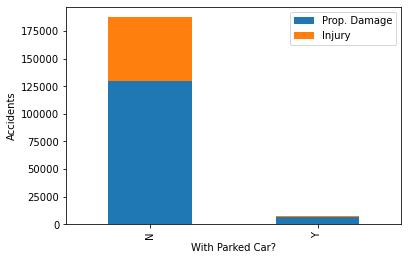

In [13]:
pd.crosstab(short_df['HITPARKEDCAR'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("With Parked Car?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows that more accidents occur between moving cars, as opposed to including a parked car. There is a notable increase to the proportion of injury to property damage for the accidents with moving cars.

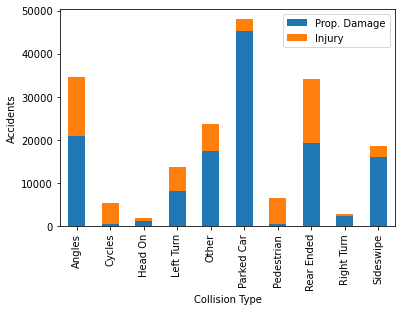

In [14]:
pd.crosstab(short_df['COLLISIONTYPE'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("Collision Type")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

When further seperating the collistion types, it is shown that collisions with parked occurs the most often. This is slightly surprising when considering the previous plot. However, it is rather clear that the 'Parked Car' instances would be small relative to all other instances.

Collisions at 'Angles' and 'Rear Ended' are the next most frequent. 'Head On' collisions are the least frequent.

Colissions with 'Parked Cars' result in proportionally the least amount of injury. Both collisions at 'Angles' and 'Rear Ended' have rather high rates of injury. Notably, collistions with 'Cycles' and 'Pedestrians' result in the highest proportion of injuries per occurance.

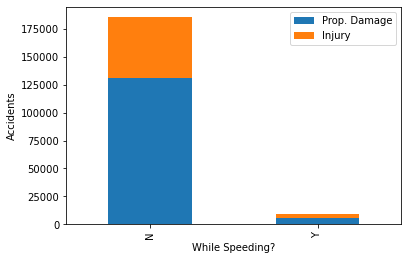

In [15]:
pd.crosstab(short_df['SPEEDING'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("While Speeding?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows a large number of accidents even when it was reported the vehicles were traveling below the posted speed limits.

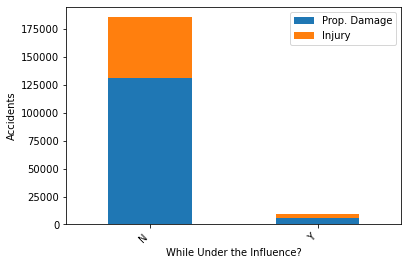

In [16]:
pd.crosstab(short_df['UNDERINFL'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
y_pos = np.arange(2)
plt.xticks(y_pos, ['N', 'Y'], rotation=45, horizontalalignment='right')
plt.xlabel("While Under the Influence?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows a reduced number of reported accidents including the driver being under the influence.

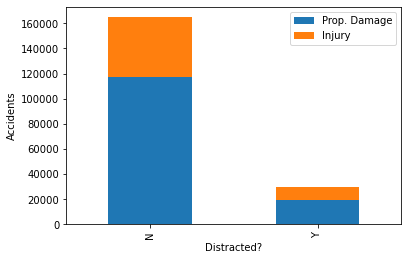

In [17]:
pd.crosstab(short_df['INATTENTIONIND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("Distracted?")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows a fair amount of accidents occuring when the driver was distracted. It is interesting to note that more accidents were reported when the driver was distracted as opposed to speeding or being under the influence.

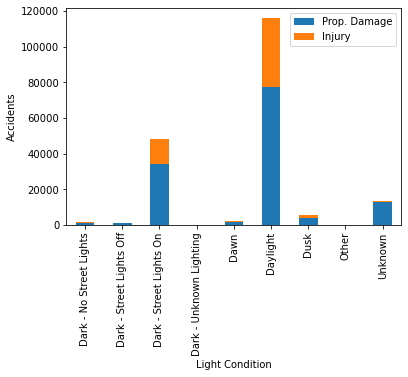

In [18]:
pd.crosstab(short_df['LIGHTCOND'], short_df['SEVERITYCODE']).plot(kind='bar', stacked=True)
plt.xlabel("Light Condition")
plt.ylabel("Accidents")
plt.legend(['Prop. Damage', 'Injury'])

This plot shows that accidents occured most frequently during the day. The second highest occured in the dark. 

#### ML Analysis

The Jaccard score, F1-score, and LogLoss (for logistic regression) were computed for the performed classifying algorthims.

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ERR       | ERR        | NA      |
| Decision Tree      | 0.7323      | 0.8455        | NA      |
| SVM                | ERR       | ERR        | NA      |
| LogisticRegression | 0.6913       | 0.8175        | 0.5815       |

The decision tree shows slightly improved accuracy relative to logistic regression. The other algorithms, KNN and SVM, could not be computed in a timely manner, as they require high computational expense and are not practical for large data sets or analysis of many feature-dimensions.

## Conclusion <a name="conclusion"></a>

We sought to determine the key factors that have increased probabilty of injury during a car accident. We were able to determine that the type of collision is a leading feature that determines this probability. Accidents resulting in injury are least likely to happen when occuring with a parked car. The next set of key features are the light conditions, address type (alley, block, intersection), and whether the driver was under the influence.

Some features did not indicate relevance when determining this probability. The day of the week and the month of the year had very little impact on the proportion of accidents resulting in property damage to accidents resulting in injury.